# ¡Hola Carmen! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


----

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Carmen, en general tu trabajo va muy bien: lograste hacer una exploración inicial adecuada de los datos, identificaste correctamente patrones relevantes en los barrios con mayor actividad, y aplicaste de forma correcta la prueba de hipótesis, mostrando una comprensión clara de los conceptos estadísticos. 

Sin embargo, es importante que revises la visualización relacionada con la cantidad de viajes por compañía, ya que allí faltó utilizar un gráfico de barras adecuado para responder correctamente a la pregunta planteada; esto es clave para que el análisis sea claro y entendible para otros. 

Sigue adelante, vas por buen camino y con pequeños ajustes tu análisis será mucho más completo.

Estaré atento a tu próxima iteración 👀


</div>

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

¡Carmen excelente trabajo con los ajustes! Tu proyecto ahora cumple con todos los objetivos propuestos. Estoy seguro de que lo que aprendiste aquí te será muy útil más adelante. 

¡Éxito en tu próximo sprint! 🚀

*Estado del Proyecto:* **Aprobado**

</div>

-----

In [1]:
#importar Líbrerias
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
#Leer archivo 1
neighborhoods_filter=pd.read_csv("/datasets/project_sql_result_04.csv")

In [3]:
#Ver archivo y tipo de datos
neighborhoods_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [4]:
#Vista general del archivo
neighborhoods_filter.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


El tipo de datos es adecuado y no hay valores nulos, se procede a hacer el analisis 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `info` y `head`, esto te permite hacer una primera revisión de los datos, su estructura y contenido

</div>

In [5]:
#Principales barrios
principal_neighborhoods=neighborhoods_filter.sort_values(ascending=False, by="average_trips")

In [6]:
#Limitar a los primeros 10
top_10_neighborhoods=principal_neighborhoods[0:10]

In [7]:
top_10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


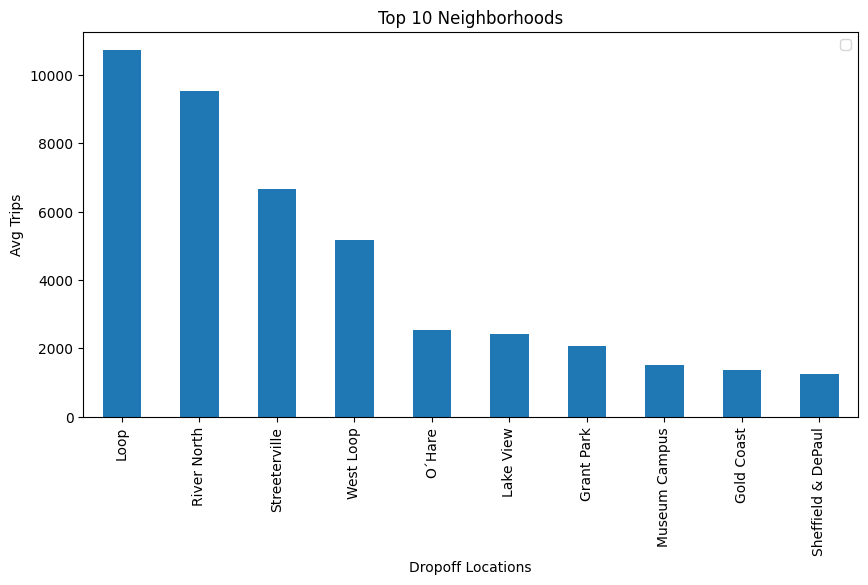

In [8]:
top_10_neighborhoods.plot(kind="bar", figsize=(10,5), xlabel="Dropoff Locations", ylabel="Avg Trips", title="Top 10 Neighborhoods")
plt.xticks([0,1,2,3,4,5,6,7,8,9],['Loop','River North','Streeterville','West Loop','O´Hare','Lake View','Grant Park','Museum Campus','Gold Coast','Sheffield & DePaul'])
plt.legend('')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Buen trabajo obteniendo el Top de barrios! Lograste identificar y jerarquizar bien los de mayor actividad, destacando la diferencia notable con barrios como Loop y River North, que seguramente destacan por su relevancia comercial y turística.

</div>

Se muestran los 10 vecindarios con mayor promedio de viajes terminados. Tanto Loop como River North demuestran ser los principales destinos.

In [9]:
#Leer archivo 2
cabs_filter=pd.read_csv("/datasets/project_sql_result_01.csv")

In [10]:
#Ver archivo y tipo de datos
cabs_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [11]:
#Vista general del archivo
cabs_filter.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [12]:
#Empresas de taxis y número de viajes
ord_cabs=cabs_filter.sort_values(ascending=False, by="trips_amount")

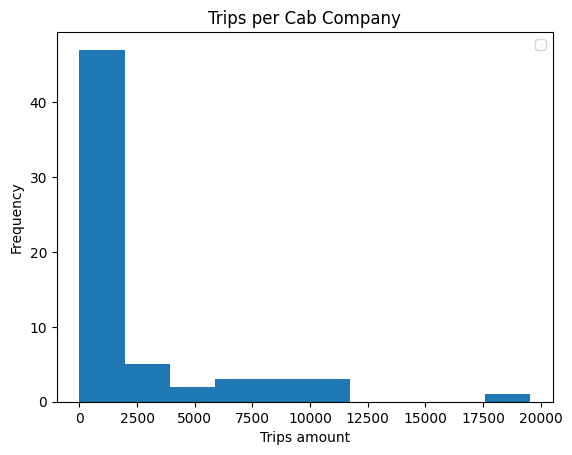

In [13]:
ord_cabs.plot(kind='hist',bins=10)
plt.title('Trips per Cab Company')
plt.xlabel('Trips amount')
plt.ylabel('Frequency')
plt.legend('')
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Para esta pregunta la idea es ver la cantidad de viajes por compañia, por lo que es necesario usar un diagrama de barras donde el eje X corresponde al nombre de las principales empresas. 

</div>

Se tienen la cantidad de viajes de 64 diferentes compañias de taxis durante el 15 y 16 de noviembre del 2017. La mayor frecuencia se presenta de 0 a aproximadamente 2000 viajes por compañia.

<div class="alert alert-block alert-info">
<b>Hola, buen día. En el momento de estar gráficando me parecio que una gráfica de barras no podría mostrar claramente la información por la gran cantidad de empresas de taxis, sin embargo despliego una gráfica con las 64 compañias y otra con las 15 compañias con mayor demanda</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Es cierto que hay información de muchas compañias, lo que hace que no sea tan clara la gráfica, pero la forma cómo lo abordaste es correcta, mostrar las principales empresas para hacernos una idea de la dinámica de mercado

</div>

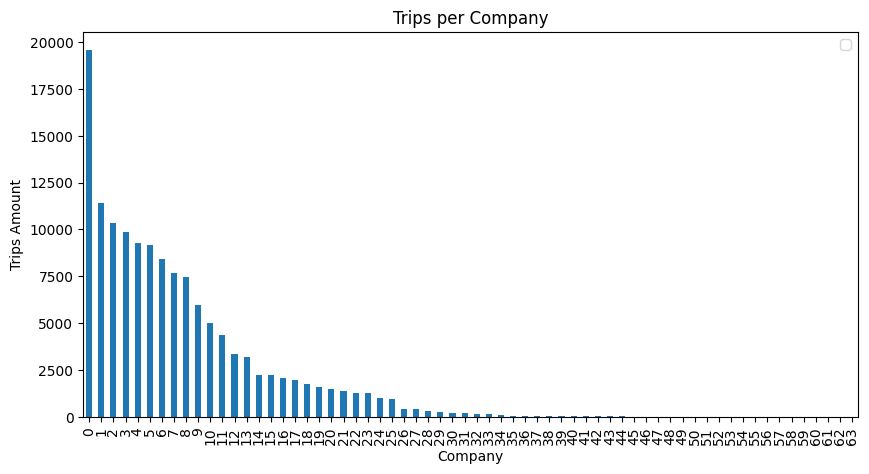

In [14]:
#Grafico de barras para 64 compañias
ord_cabs.plot(kind="bar", figsize=(10,5), xlabel="Company", ylabel="Trips Amount", title="Trips per Company")
plt.legend('')
plt.show()

Se muestran la cantidad de viajes hechos por 64 diferentes compañias durante el 15 y 16 de noviembre del 2017. Se aprecia que una compañia es la que lideró el número de viajes hechos durantes los días antes mencionados.

In [15]:
#Grafíca de barrras para 15 compañias con mayor demanda
top_15_cabs=ord_cabs[0:15]
top_15_cabs

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


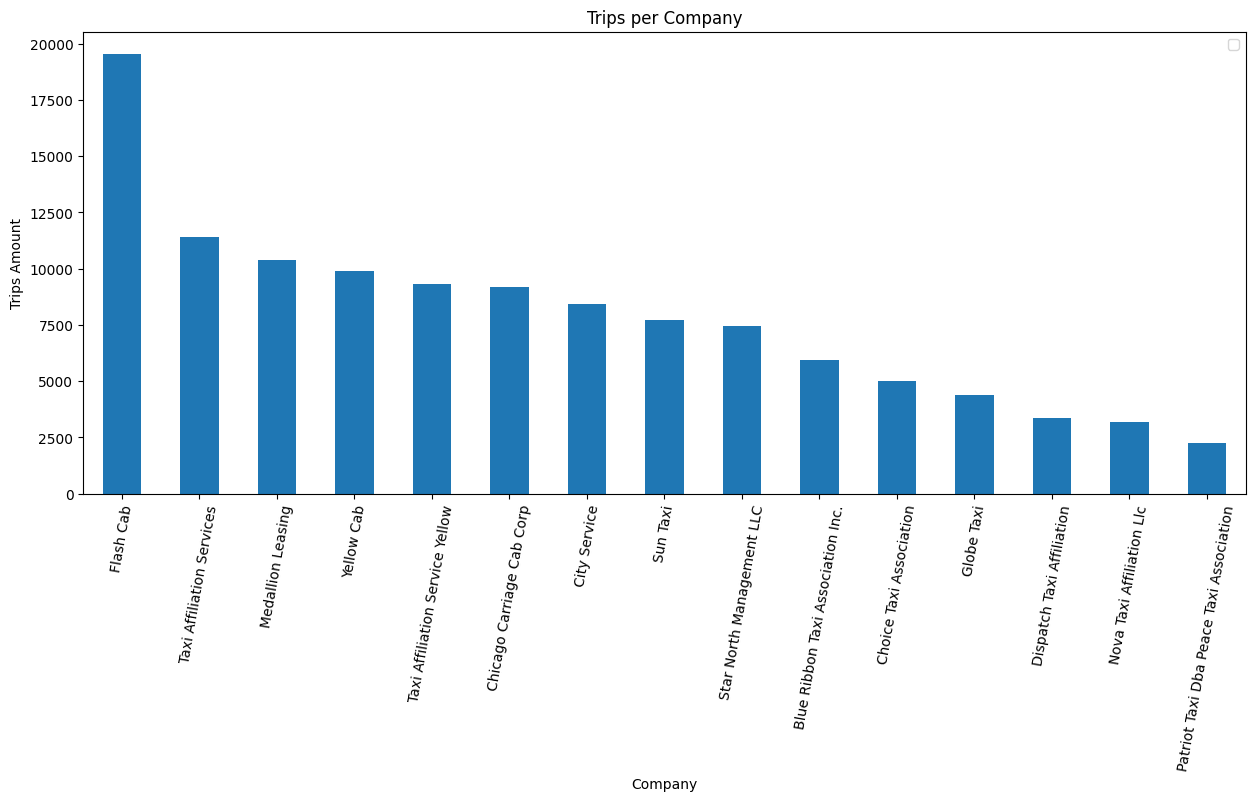

In [16]:
#Gráfica de barras de las 15 compañias con mayor demanda
top_15_cabs.plot(kind="bar", figsize=(15,6), xlabel="Company", ylabel="Trips Amount", title="Trips per Company")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],['Flash Cab','Taxi Affiliation Services','Medallion Leasing','Yellow Cab','Taxi Affiliation Service Yellow','Chicago Carriage Cab Corp','City Service','Sun Taxi','Star North Management LLC','Blue Ribbon Taxi Association Inc.','Choice Taxi Association','Globe Taxi','Dispatch Taxi Affiliation','Nova Taxi Affiliation Llc','Patriot Taxi Dba Peace Taxi Association'], rotation=80)
plt.legend('')
plt.show()

Aqui podemos apreciar las 15 compañias con la mayor demanda. La compañia más solicitada fue Flash Cab.

In [17]:
#Leer archivo 3
loop_to_airport=pd.read_csv('/datasets/project_sql_result_07.csv')

In [18]:
#Ver archivo y tipo de datos
loop_to_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [19]:
loop_to_airport.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [20]:
#Agregación de columna para minutos
loop_to_airport["duration_minutes"]=loop_to_airport["duration_seconds"]/60

Prueba de Hipótesis

H0=La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare NO cambia los sábados lluviosos
HA=La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos

Se contractará con un nivel de significancia de 0.05

In [21]:
#Grupo sin lluvia
sat_not_rain=loop_to_airport[loop_to_airport["weather_conditions"]=="Good"]["duration_minutes"]

In [22]:
#Grupo con lluvia
sat_rain=loop_to_airport[loop_to_airport["weather_conditions"]=="Bad"]["duration_minutes"]

In [23]:
#Prueba de Levine para ver si hay diferencias en las varianzas
#de los días con lluvia y sin lluvia
alpha=0.05
var=st.levene(sat_not_rain,sat_rain)
print("Valor p:", var.pvalue)
if var.pvalue<alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

Valor p: 0.5332038671974493
No rechazamos la hipótesis nula


In [24]:
#Se elaborara una prueba de t-test, con IGUALDAD de varianzas
alpha=0.05
results=st.ttest_ind(sat_not_rain,sat_rain)
print("Valor p:", results.pvalue)
if results.pvalue<alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

Valor p: 6.517970327099828e-12
Rechazamos la hipótesis nula


Se concluye que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare sí cambia los sábados lluviosos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Carmen aplicaste correctamente la prueba de hipótesis comparando la distribución de dos muestras independientes e interpretando de manera acertada el `p-value` obtenido y su relación con la hipótesis nula, logrando comprobar que el clima sí afecta la duración de los viajes en Taxi

</div>